after webscraping is the cleaning phase 

In [85]:
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split
from sklearn.compose import TransformedTargetRegressor
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
import datetime
from datetime import timedelta
import ast
import json    
import missingno as msno

In [109]:


path = '../data/23-8-2022.csv' # mannuly i put the name of each day 
df = pd.read_csv(path)

## check IF THESE COLUMNS EXISIT THEN DELETE 

In [110]:

try:
   df.drop([ 'rega_id'] , axis = 1 , inplace=True)
except:
   i=1

In [111]:
try:
    df.drop(['Unnamed: 0.1' , 'Unnamed: 0'] , axis = 1 , inplace=True)
except:
     try:
        df.drop([ 'Unnamed: 0'] , axis = 1 , inplace=True)
     except:
        i=1

In [112]:
df.columns

Index(['user_id', 'id', 'uri', 'title', 'price', 'content', 'imgs', 'refresh',
       'category', 'beds', 'livings', 'wc', 'area', 'type', 'street_width',
       'age', 'last_update', 'street_direction', 'ketchen', 'ac', 'furnished',
       'location', 'path', 'user', 'native', 'rent_period', 'city', 'district',
       'width', 'length', 'advertiser_type', 'create_time', '__typename'],
      dtype='object')

In [113]:
df.shape # check the shape usually betweeen 6500- 7100 

(7286, 33)

## function to change the date from second to date fromat YYYY-MM-DD 

In [115]:
df.create_time[0]

1655559387

In [117]:
def toDate(sec): # i have the time in second so to convert to date %yyyy-%mm-%dd
    try:
        a = datetime.datetime.fromtimestamp(sec)
        a = str(a) 
        a = a.split(" ")
        return a 
    except:
        return sec

In [118]:
# df['create_time'] = df['column name'].replace(['1st old value','2nd old  value',...],['1st new value','2nd new value',...])
i = 0 
while i < len(df['create_time']):
    df['create_time'][i] = toDate(df['create_time'][i])
    i+=1

/tmp/ipykernel_11479/2196997981.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['create_time'][i] = toDate(df['create_time'][i])


In [119]:
df.create_time[0]

['2022-06-18', '13:36:27']

In [93]:
i = 0 #refresh too and last update
while i < len(df['refresh']):
    df['refresh'][i] = toDate(df['refresh'][i])
    i+=1

/tmp/ipykernel_11479/2385382091.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['refresh'][i] = toDate(df['refresh'][i])


In [94]:
i = 0 
while i < len(df['last_update']):
    df['last_update'][i] = toDate(df['last_update'][i])
    i+=1

/tmp/ipykernel_11479/1382014819.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['last_update'][i] = toDate(df['last_update'][i])


-----

# extract information from user feature

In [120]:
df['user'][3]

"{'review': 4.39, 'img': '500871265_1660339646348.jpg', 'name': '\\u200fمؤسسة بيت العمر العقارية', 'phone': 0, 'iam_verified': True, 'rega_id': '0222276', '__typename': 'ListingUser'}"

create these new columns

In [122]:
df['review'] = 0
df['profileImg'] = 0
df['UserName'] = 0
df['phone'] = 0
df['iam_verified'] = True
df['rega_id'] = 0 # the coluns user has a dic with 6 keys 

In [123]:
i = 0 #will create the column called review that will have the user review 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['review'][i] = res.get('review')
    i+=1

/tmp/ipykernel_11479/2489357915.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['review'][i] = res.get('review')


In [124]:
df["review"].isna().sum()

426

In [125]:
i = 0  #extra columns 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['review'][i] = res.get('review')
    i+=1

In [126]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['profileImg'][i] = res.get('img')
    i+=1

/tmp/ipykernel_11479/2896461739.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['profileImg'][i] = res.get('img')


In [127]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['UserName'][i] = res.get('name')
    i+=1

/tmp/ipykernel_11479/1460742994.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UserName'][i] = res.get('name')


In [128]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['iam_verified'][i] = res.get('iam_verified')
    i+=1

/tmp/ipykernel_11479/3738396795.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['iam_verified'][i] = res.get('iam_verified')


In [129]:
i = 0 
while i < len(df['user']):
    a = df['user'][i]
    res = ast.literal_eval(a)
    
    df['phone'][i] = res.get('phone')
    i+=1

/tmp/ipykernel_11479/184754266.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['phone'][i] = res.get('phone')


In [130]:
df.columns

Index(['user_id', 'id', 'uri', 'title', 'price', 'content', 'imgs', 'refresh',
       'category', 'beds', 'livings', 'wc', 'area', 'type', 'street_width',
       'age', 'last_update', 'street_direction', 'ketchen', 'ac', 'furnished',
       'location', 'path', 'user', 'native', 'rent_period', 'city', 'district',
       'width', 'length', 'advertiser_type', 'create_time', '__typename',
       'review', 'profileImg', 'UserName', 'phone', 'iam_verified', 'rega_id'],
      dtype='object')

see the data

In [131]:
df[['review', 'profileImg', 'UserName', 'phone', 'iam_verified', 'rega_id']]

,review,profileImg,UserName,phone,iam_verified,rega_id
0,NaN,NaN,Ghla,0,True,0
1,4.65,552660696_1612894963639.jpg,مكتب خالد ابراهيم علي حريصي للخدمات العقارية,0,True,0
2,3.49,None,مكتب أسقف الجوهرة للعقارات,0,True,0
3,4.39,500871265_1660339646348.jpg,‏مؤسسة بيت العمر العقارية,0,True,0
4,4.44,None,ابو علي مگتب عقار,0,True,0
...,...,...,...,...,...,...
7281,3.00,None,None,0,True,0
7282,4.15,595860574_1647466275475.jpg,آبًوٌ فُهّدٍ,0,True,0
7283,3.98,None,عقار جديد,0,True,0
7284,4.41,509679578_1597848607618.jpg,مكتب عبدالله بن ابراهيم الفجحان,0,None,0


In [134]:
df['review'].value_counts()

5.00    509
4.36    313
4.39    288
4.27    277
4.06    205
       ... 
3.45      1
3.35      1
4.97      1
3.25      1
3.36      1
Name: review, Length: 158, dtype: int64

## phone feature has  zero variance 

In [133]:
df['phone'].value_counts()

0    7286
Name: phone, dtype: int64

<AxesSubplot:>

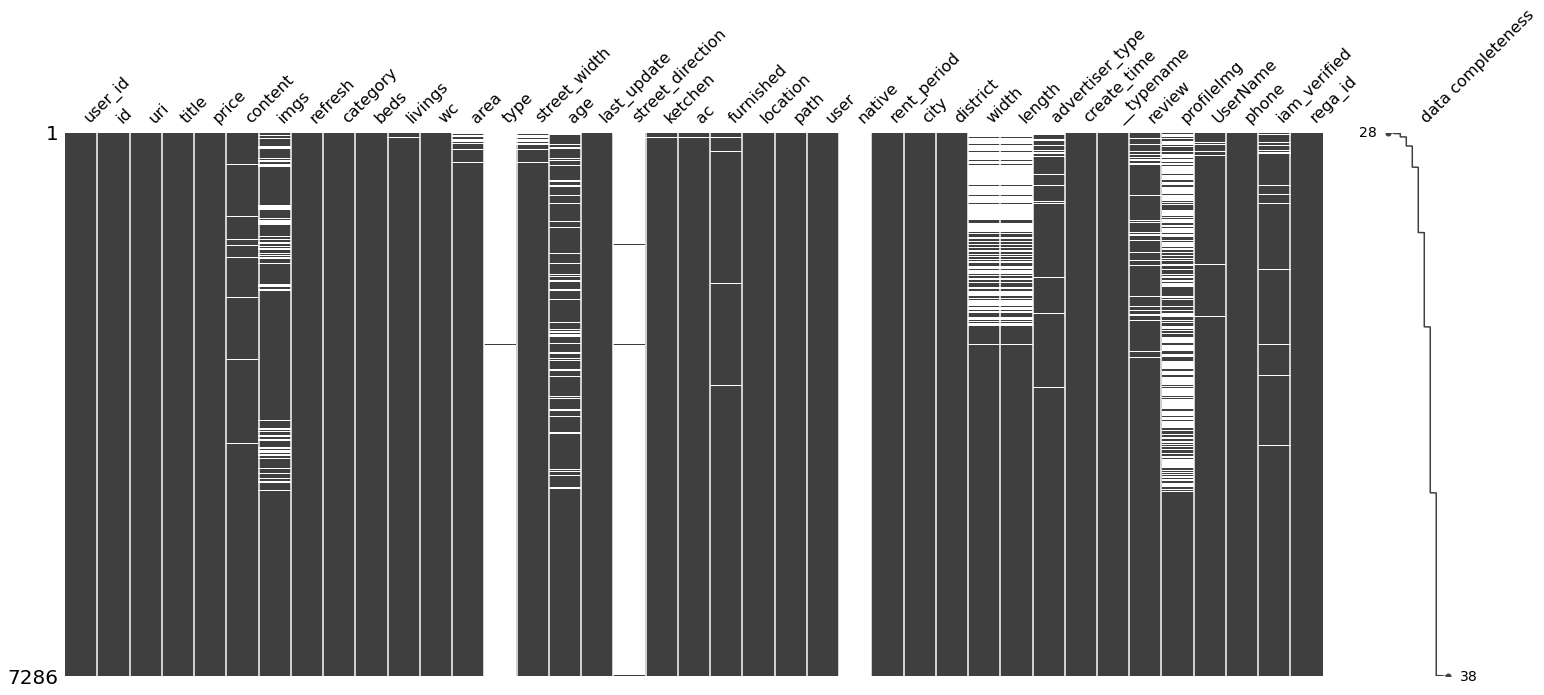

In [132]:
msno.matrix(df, labels=True, filter="bottom", sort="ascending", n=50)

## delete unwanted columns 

In [136]:
#delete zero-varince columns
df.drop('category' , inplace=True , axis =1) # all has same value 
df.drop('street_direction' , inplace=True , axis =1) # lots of na 
df.drop('native' , inplace=True , axis =1) #all are na
df.drop('rent_period' , inplace=True , axis =1) # all elemnets has same value 
df.drop('city' , inplace=True , axis =1) # all elemnets has same value
df.drop('__typename' , inplace=True , axis =1) #all are na
df.drop('phone' , inplace=True , axis =1) # all elemnets has same value
df.drop('type' , inplace=True , axis =1) # lots of na 
df.drop('uri' , inplace=True , axis =1) # this doesn't add anything title+id c
## length and width has lots of na 50% of the values but i am still not sure also there is the area whitch by itself make scense  

<AxesSubplot:>

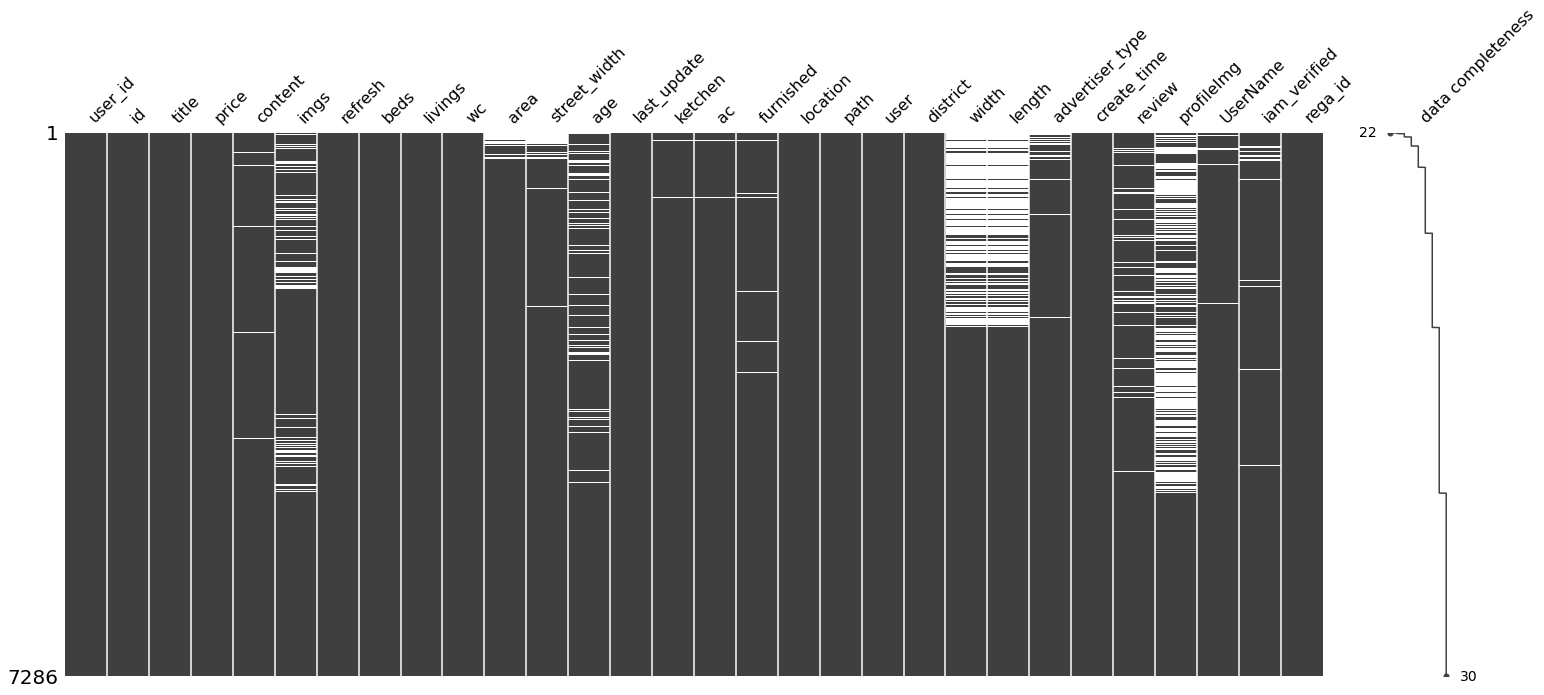

In [137]:
msno.matrix(df, labels=True, filter="bottom", sort="ascending", n=50)

In [145]:
try:
    df.drop(['user' , 'rega_id'] , axis = 1 , inplace=True)
except:
     try:
        df.drop([ 'rega_id'] , axis = 1 , inplace=True)
     except:
        try:
               df.drop([ 'user'] , axis = 1 , inplace=True)
        except:
                  iq=3

In [146]:
df.columns

Index(['user_id', 'id', 'title', 'price', 'content', 'imgs', 'refresh', 'beds',
       'livings', 'wc', 'area', 'street_width', 'age', 'last_update',
       'ketchen', 'ac', 'furnished', 'location', 'path', 'district', 'width',
       'length', 'advertiser_type', 'create_time', 'review', 'profileImg',
       'UserName', 'iam_verified'],
      dtype='object')

In [147]:
df.to_csv(path , index=False )

after cleaning phase i go to joining all the files